# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed

In [34]:
from scipy.stats import t

In [3]:
# import data
medical = pd.read_csv('insurance2.csv')

In [4]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__The distribution does not seem to be normal. The distribution also has fat tail (around $40000 and high values at $60000)

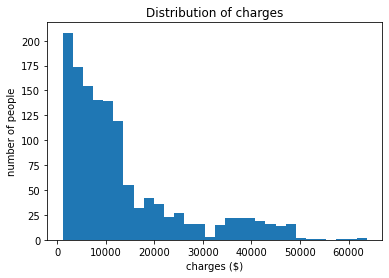

In [6]:
_ = plt.hist(medical.charges, bins=30)
_ = plt.xlabel('charges ($)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of charges')

In [7]:
# Calculate mean and std dev
medical.charges.mean(), medical.charges.std()

(13270.422265141257, 12110.011236693994)

In [8]:
# Calculate median
medical.charges.median()

9382.033

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__We can use this data to answer the question because i) the sample is representative and ii) sample size is large. Given the large sample size, the Central Limit Theory (CLT) tells us the sample mean is normally distributed.

We can test manager's concern in two ways:

i) Using the sample, we can build interval estimate of the population mean. If the interval is higher (and does not include  12,000), we then conclude the average is still above 12,000)

ii) Alternatively, we can do hypothesis testing
    H0: average charge <= 12,000
    Ha: average charge > 12,000

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__We will calucalte interval estimate of population mean. So we will have two-sided interval
The 95% confidence of the interval estimate of population mean is [12621, 13920]. This interval is above 12,000, so we conclude that the average charge is still higher than 12,000.

In [13]:
# calcualte std err of sample mean
std_err = medical.charges.std()/np.sqrt(len(medical))
print (std_err)

331.06745431568226


In [14]:
# Critical t-value for two-sided interval at 95%
critical_t = t.ppf(0.975, df=(len(medical)-1), loc=0, scale=1)
print(critical_t)

1.961739888600845


In [15]:
# Calculate 95% confidence interval for the mean
medical.charges.mean() - critical_t*std_err, medical.charges.mean() + critical_t*std_err

(12620.954034192644, 13919.890496089869)

In [16]:
# Use t.interval() for 95%
t.interval(0.95, df=(len(medical)-1), loc=medical.charges.mean(), scale=std_err)

(12620.954034192644, 13919.890496089869)

In [17]:
# Use t.interval() for 99%
t.interval(0.99, df=(len(medical)-1), loc=medical.charges.mean(), scale=std_err)

(12416.429943203952, 14124.414587078561)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__Null hypothesis: people with or without insurance are charged equally.
Alternative hypothesis: they are charged differently.

Assumption about the variances is the two groups have same variance.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [37]:
# subscript 0 is for people without insurance, 1 is for with insurance
x_0 = medical[medical.insuranceclaim ==0].charges.mean()
s_0 = medical[medical.insuranceclaim ==0].charges.std()
n_0 = len(medical[medical.insuranceclaim ==0])
print (x_0, s_0, n_0)

8821.421892306294 6446.510126811736 555


In [38]:
x_1 = medical[medical.insuranceclaim ==1].charges.mean()
s_1 = medical[medical.insuranceclaim ==1].charges.std()
n_1 = len(medical[medical.insuranceclaim ==1])
print (x_1, s_1, n_1)

16423.928276537663 14045.928418802127 783


In [39]:
# Calculate pooled std dev
pooled_stddev = np.sqrt(((n_0-1)*(s_0**2) + (n_1-1)*(s_1**2))/(n_0+n_1-2))
print(pooled_stddev)

11520.034268775256


In [40]:
# Calculate t value
t_value = (x_0 - x_1)/(pooled_stddev*np.sqrt((1/n_0)+(1/n_1)))
print(t_value)

-11.89329903087671


In [44]:
# Find p-value for this t value, two-sided test
2*t.sf(abs(t_value), df=(n_0+n_1-2), loc=0, scale=1)

4.461230231620972e-31

### Let us use stats.ttest_ind

In [36]:
# Import stats
from scipy import stats

In [42]:
# Test charges without and with insurance
stats.ttest_ind(medical[medical.insuranceclaim ==0].charges, medical[medical.insuranceclaim ==1].charges)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__There is no z-test. There is no need for z-test since t-test includes z-test when degree of freedom is large.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test